In [ ]:
#the idea here is to get practice working with JSON files and generating data etc. from them.

To process an entire paper, all I need to do is use the following import:

from functions_and_classes.paper_processing import process_and_score_paper as psp



In [ ]:
from data.txts import txt_list
from data.csvs import csv_list
from data.jsons import json_list

In [ ]:
print(len(txt_list))
print(len(csv_list))
print(len(json_list))


In [ ]:
from data import txt_dir
from data import json_dir
from data import csv_dir

In [ ]:
print(txt_dir)
print(json_dir)
print(csv_dir)

In [ ]:
from functions_and_classes.paper_processing import process_and_score_paper as psp

In [ ]:
tp = psp('533Cottrell')

In [ ]:
tp.s_w_c['1.4.6']

So, those three imports alone are capable of processing a paper by putting in its file name (with no .txt and no directory), scoring the file and pairing it with the relevant bibliographic information.

In [ ]:
from functions_and_classes.lit_level_operations import lit_scores_from_jsons

In [ ]:
ls = lit_scores_from_jsons()

In [ ]:
ls['lit_s_w_c']['1.1.1']

In [ ]:
from functions_and_classes.lit_level_operations import pd_to_csv, cd_to_csv

In [ ]:
from functions_and_classes.lit_level_operations import lit_to_csv

In [ ]:
lit_to_csv(ls)

In [1]:
import pandas as pd

In [2]:
from functions_and_classes.comparisons import s_l_p, a_l_p, s_l_c, a_l_c

In [ ]:
from functions_and_classes.comparisons import updateSLCcomps, updateALCcomps, updateSLPcomps, updateALPcomps

Everything below here is basically just to manually update the comparison spreadsheets in a one time way to include the cite counts for each file. each time the update functions are run in the future they'll automatically take care of this information.

In [ ]:
tSLCcomp = pd.read_csv('data/s_l_c_comp.csv', index_col=0)
tALCcomp = pd.read_csv('data/a_l_c_comp.csv', index_col=0)
tSLPcomp = pd.read_csv('data/s_l_p_comp.csv', index_col=0)
tALPcomp = pd.read_csv('data/a_l_p_comp.csv', index_col=0)

In [2]:
import json

In [ ]:
strict_cite_count = {}
agg_cite_count = {}
for file in json_list:
    fp = json_dir+file
    jfile = open(fp, 'r')
    jd = json.load(jfile)
    strict_cite_count[jd['name']] = jd['totalStrictCites']
    agg_cite_count[jd['name']] = jd['totalAggressiveCites']
scc_df = pd.DataFrame.from_dict(strict_cite_count, orient='index', columns=['totalStrictCites'])
agg_df = pd.DataFrame.from_dict(agg_cite_count, orient='index', columns=['totalAggressiveCites'])
total_strict_cites = scc_df['totalStrictCites'].sum()
total_agg_cites = agg_df['totalAggressiveCites'].sum()
lit_scc = pd.DataFrame([total_strict_cites], index=['Literature'], columns=['totalStrictCites'])
scc_df = scc_df.append(lit_scc)
lit_agg = pd.DataFrame([total_agg_cites], index=['Literature'], columns=['totalAggressiveCites'])
agg_df = agg_df.append(lit_agg)

In [ ]:
tSLPcomp = pd.merge(tSLPcomp, scc_df, left_index=True, right_index=True)
tSLPcomp.to_csv('data/s_l_p_comp.csv')
tALPcomp = pd.merge(tALPcomp, agg_df, left_index=True, right_index=True)
tALPcomp.to_csv('data/a_l_p_comp.csv')
tSLCcomp = pd.merge(tSLCcomp, scc_df, left_index=True, right_index=True)
tSLCcomp.to_csv('data/s_l_c_comp.csv')
tALCcomp = pd.merge(tALCcomp, agg_df, left_index=True, right_index=True)
tALCcomp.to_csv('data/a_l_c_comp.csv')

In [3]:
from data import a_l_p_comp, a_l_c_comp, s_l_p_comp, s_l_c_comp

In [7]:
#starting to work towards a function that will return
def sim_list(filename, a_or_s, p_or_c, min_list_len):
    if a_or_s == 'a':
        if p_or_c == 'p':
            df = a_l_p_comp
        elif p_or_c == 'c'
            df = a_l_c_comp
        else:
            print('Your third function input must be "p" or "c")
    elif a_or_s == 's': 
        if p_or_c == 'p':
            df = s_l_p_comp
        elif p_or_c == 'c':
            df = s_l_c_comp
        else:
            print('Your third function input must be "p" or "c")
    else:
        print('Your second function input must be "a" or "s"')

def s_l_c_simlist(filename, min_list_len):
    df = pd.merge(s_l_c_comp[filename], s_l_c_comp['totalStrictCites'], left_index=True, right_index=True)
    df[]
        
    

,Literature,project_muse_388443,penelhum-themes-book,project_muse_389389,project_muse_227867,SCHIHA-3.2,Kail-2008-European_Journal_of_Philosophy,WINKLER-2010-Philosophical_Books,20708617,2653404-2,...,26303717,project_muse_390704,2106947,project_muse_389490,project_muse_382731,ContentServer.asp-8,40232176,project_muse_228761,27744766,totalAggressiveCites
Literature,0.000000,133.665003,112.512211,163.251764,83.363552,100.0,121.852096,116.072960,95.632546,95.789176,...,188.474912,113.466786,189.084345,143.004261,156.227264,172.397774,99.536993,134.518959,112.460938,5033
project_muse_388443,133.665003,0.000000,133.433930,165.738619,150.498728,100.0,155.999730,169.421033,142.047507,150.497909,...,182.828889,156.220526,192.374746,184.592231,175.872469,196.669001,127.400858,117.758489,156.214810,35
penelhum-themes-book,112.512211,133.433930,0.000000,168.627106,106.667077,100.0,168.244291,167.866601,126.663407,105.078519,...,197.146766,104.538919,197.146766,177.692900,174.954045,197.146766,135.070957,145.298118,71.365049,70
project_muse_389389,163.251764,165.738619,168.627106,0.000000,171.448985,100.0,152.645360,174.683981,142.870410,171.448985,...,200.000000,140.672652,200.000000,200.000000,155.155226,200.000000,164.252506,184.619499,171.448985,7
project_muse_227867,83.363552,150.498728,106.667077,171.448985,0.000000,100.0,135.444631,128.004539,107.184064,85.481931,...,181.628904,88.099894,181.628904,151.261580,174.998958,185.711370,140.546478,175.712913,90.082927,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
project_muse_382731,156.227264,175.872469,174.954045,155.155226,174.998958,100.0,153.512966,139.533881,144.859627,175.870291,...,200.000000,159.626179,200.000000,200.000000,0.000000,165.984239,147.042757,180.180073,175.000346,24
ContentServer.asp-8,172.397774,196.669001,197.146766,200.000000,185.711370,100.0,185.178118,150.272877,177.367998,194.271653,...,180.004001,200.000000,183.335001,180.004001,165.984239,0.000000,179.421100,176.598421,200.000000,20
40232176,99.536993,127.400858,135.070957,164.252506,140.546478,100.0,147.978330,154.378509,124.502239,135.366528,...,200.000000,139.186381,199.746987,176.556144,147.042757,179.421100,0.000000,109.968030,146.224879,132
project_muse_228761,134.518959,117.758489,145.298118,184.619499,175.712913,100.0,169.359746,169.221138,148.428649,164.571282,...,190.098951,182.143246,192.412762,182.509732,180.180073,176.598421,109.968030,0.000000,180.409869,101


In [4]:
t_df = pd.merge(s_l_c_comp['Literature'], s_l_c_comp['totalStrictCites'], left_index=True, right_index=True)

In [62]:
def n_strict_filter(df_in, num):
    return df_in['totalStrictCites'] > num

In [63]:
def m_strict_similar(filename, min_cites, min_similar, df_in):
    min_cit = max(0,min_cites)
    min_c = n_strict_filter(df_in, min_cit)
    min_si = min(min_similar,len(df_in[min_c].index)-1)
    sim_score_to_beat = 1.05 * df_in[min_c].sort_values(filename)[min_si:min_si+1][filename].values[0]
    score_to_beat_filter = df_in[min_c][filename] <= sim_score_to_beat

    return df_in[min_c][score_to_beat_filter].sort_values(filename)
    

In [64]:
def s_l_c_comp_process(file, minimum_comp_cites, minimum_sim_comps):
    df = pd.merge(s_l_c_comp[file], s_l_c_comp['totalStrictCites'], left_index=True, right_index=True)
    return m_strict_similar(file, minimum_comp_cites, minimum_sim_comps, df)[1:]

def s_l_p_comp_process(file, minimum_comp_cites, minimum_sim_comps):
    df = pd.merge(s_l_p_comp[file], s_l_p_comp['totalStrictCites'], left_index=True, right_index=True)
    return m_strict_similar(file, minimum_comp_cites, minimum_sim_comps, df)[1:]

In [65]:
s_l_p_comp_process('strawson-evident-connexion',10,59)

,strawson-evident-connexion,totalStrictCites
Literature,104.379117,2622
1173636,105.034916,102
project_muse_553401,125.284365,145
533Cottrell,127.404673,202
1173780,140.825844,60
07.0_pp_177_208_Hume_and_the_Problem_of_Personal_Identity,142.465163,92
27745095,143.239760,64
acprof-9780199229505-chapter-6,145.633533,51
thiel-early-modern-self-13-14,146.198565,16
acpq_1995_0069_0003_0485_0501&pdfname=acpq_1995_0069_0003_0091_0107,149.424078,29


In [46]:
def n_agg_filter(df_in, num):
    return df_in['totalAggressiveCites'] > num

def m_agg_similar(filename, min_cites, min_similar, df_in):
    min_cit = max(0,min_cites)
    min_c = n_agg_filter(df_in, min_cit)
    min_si = min(min_similar,len(df_in[min_c].index)-1)
    sim_score_to_beat = 1.05 * df_in[min_c].sort_values(filename)[min_si:min_si+1][filename].values[0]
    score_to_beat_filter = df_in[min_c][filename] <= sim_score_to_beat

    return df_in[min_c][score_to_beat_filter].sort_values(filename)

def a_l_c_comp_process(file, minimum_comp_cites, minimum_sim_comps):
    df = pd.merge(a_l_c_comp[file], a_l_c_comp['totalAggressiveCites'], left_index=True, right_index=True)
    return m_agg_similar(file, minimum_comp_cites, minimum_sim_comps, df)[1:]

def a_l_p_comp_process(file, minimum_comp_cites, minimum_sim_comps):
    df = pd.merge(a_l_p_comp[file], a_l_p_comp['totalAggressiveCites'], left_index=True, right_index=True)
    return m_agg_similar(file, minimum_comp_cites, minimum_sim_comps, df)[1:]

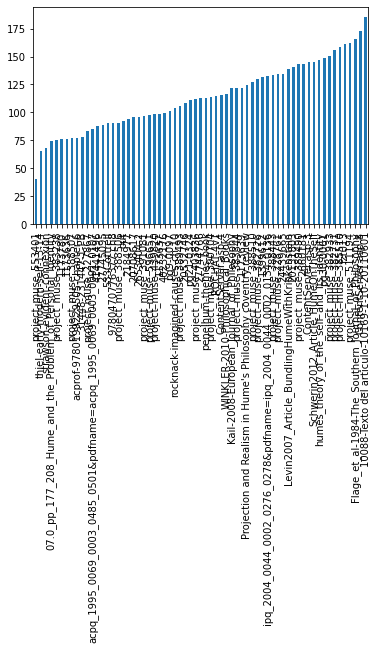

In [70]:
a_l_c_comp_process('Literature', 10, 99)['Literature'].plot.bar()

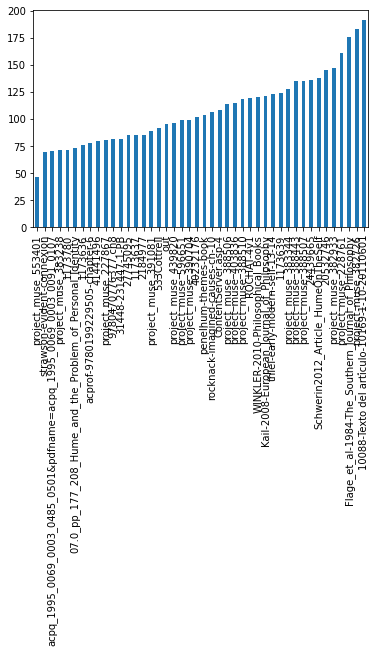

In [69]:
s_l_c_comp_process('Literature', 10, 99)['Literature'].plot.bar()

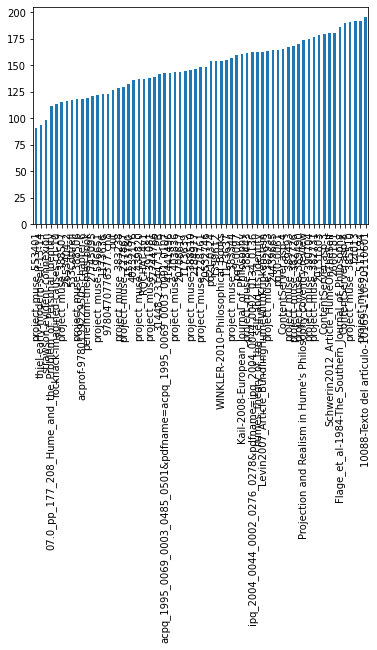

In [68]:
a_l_p_comp_process('Literature', 10, 99)['Literature'].plot.bar()

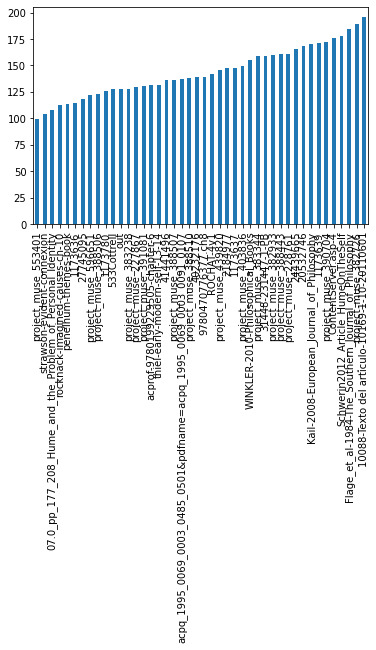

In [67]:
s_l_p_comp_process('Literature', 10, 99)['Literature'].plot.bar()

OK so far then i have functions that can handle each of the 4 types of comp data across s/a, p/c and take as optional inputs the numbers of cites in the comparison data and the minimum number of comps to return.

i think what i need to do is to make the num of cites and the min num of comps to return optional and specifiable with kws with default arguments of 1 for the min num of cites and 100 for the num num of comps. that way the default will pull the entire body (maybe display in groups of 20 at a time).

then i'll want to convert or actually just add on the paper title as a column the paper title attached to the file name for display purposes. I think it'd be good to add that on at the stage i'm attaching total cite counts. add an author and title column when i pull those from the json files and add them as columns to the intermeidate little df i merge with the comparative scores.

then it would be good to wrap all of this inside a function that takes a/s and c/p as parameters and calls the right function of these four i've developed based on the a/s and c/p parameters passed into the function.